# Assignment 1: Comparison of Multivariate Linear Regression Models

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
*In this assignment, you will get to pick your favorite data set on Kaggle (https://kaggle.com) and implement some learning models in a context of a **regression** problem.  For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or Chapter 4 of the textbook if you need additional sample codes to help with your assignment. To get started, you will need to determine which dataset to download and copy it into the directory where you wish to run your implementation (ie. same folder as this file).* 

*For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


***
## 1. BIG PICTURE (5 pts)
Write a paragraph explaining the context of the problem in which you are trying to investigate. In the same paragraph, explain why you pick your dataset. Then, you MUST include the URL to the dataset to help the TA to download it (we will assume that the data file is put into the same folder as the Jupyter Notebook file). Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * What are some basic statistics you can learn right away about this dataset?

According to the context of this dataset from Kaggle, this dataset represents weekly 2018 retail scan data for National retail volume (units) and prices. The Average Price (of avocados) reflects a per unit (per avocado) cost, even when multiple units are sold in bags. The numerical columns in the data stands for specific type of avocados, and it shows the total number of that type of avocados sold.

I pick this dataset for following reasons:
First, I really like avocados, and this dataset caught my eye at the first moment. 
Second, the dataset has a relatively clear subject, which is the price of avocados, and that makes it easier for me to determine which aspect to focus on. 
Third, this dataset has a proper size for a beginner like me. It’s neither too large for me to deal with, nor too small to make any sense.


In [25]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
def load_avocado_data(avocado_path = '.'):
    csv_path = os.path.join(avocado_path,"weatherHistory.csv")
    return pd.read_csv(csv_path)

# Take a quick look
avocado = load_avocado_data()
#avocado.rename(columns={avocado.columns[0]:"Number"}, inplace = True)
print(avocado.info())

#datasetURL = "https://www.kaggle.com/budincsevity/szeged-weather"; # required url to download for CSV file. The TA will download and run your program.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


In [26]:
avocado.head(8)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.


In [27]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [28]:
# Find empty data
avocado.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [29]:
# Drop empty data
avocado = avocado.dropna()

In [30]:
# Drop unnecessary data
avocado1 = avocado.drop(["Daily Summary", "Formatted Date", "Precip Type"], axis = 1)

In [31]:
avocado.groupby('Summary').groups

{'Breezy': Int64Index([ 7180,  8268, 11012, 11918, 11927, 11952, 11954, 12121, 12143,
             12144, 12239, 12805, 15410, 20931, 20932, 22657, 30183, 31637,
             31778, 31784, 32038, 32424, 36579, 36580, 43947, 45034, 45035,
             53776, 53777, 55227, 58293, 63683, 71915, 71936, 72116, 72117,
             72119, 72120, 72122, 72123, 72125, 72126, 72131, 75956, 75959,
             82398, 82404, 82406, 82409, 82410, 82412, 82422, 87082, 89023],
            dtype='int64'),
 'Breezy and Dry': Int64Index([57947], dtype='int64'),
 'Breezy and Foggy': Int64Index([ 5191,  5192,  5193,  5194,  5195,  5196,  5200, 38501, 41096,
             54782, 54783, 54784, 54785, 54786, 54787, 54789, 54791, 54792,
             54793, 54794, 54795, 54796, 54797, 66621, 66622, 66623, 66624,
             66822, 66823, 66824, 66825, 66826, 67293, 74905, 81758],
            dtype='int64'),
 'Breezy and Mostly Cloudy': Int64Index([   80,    81,  1312,  3233,  3235,  3980,  5172,  5173,  5174,


Since whether it is cloudy, windy or foggy will obviously affect the weather condition, we should keep the 'Summary' feature.

---
## 2. DATA DISCOVERY, CLEANING, AND SCALING (10 pts)

**Data Discover:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

Implementation Note: You will do this for all features and your code should work with datasets of all sizes (any number of features/ examples). After learning the parameters from the model, you must first normalize the new $x$ value using the mean and standard deviation that you have previously computed from the training set.

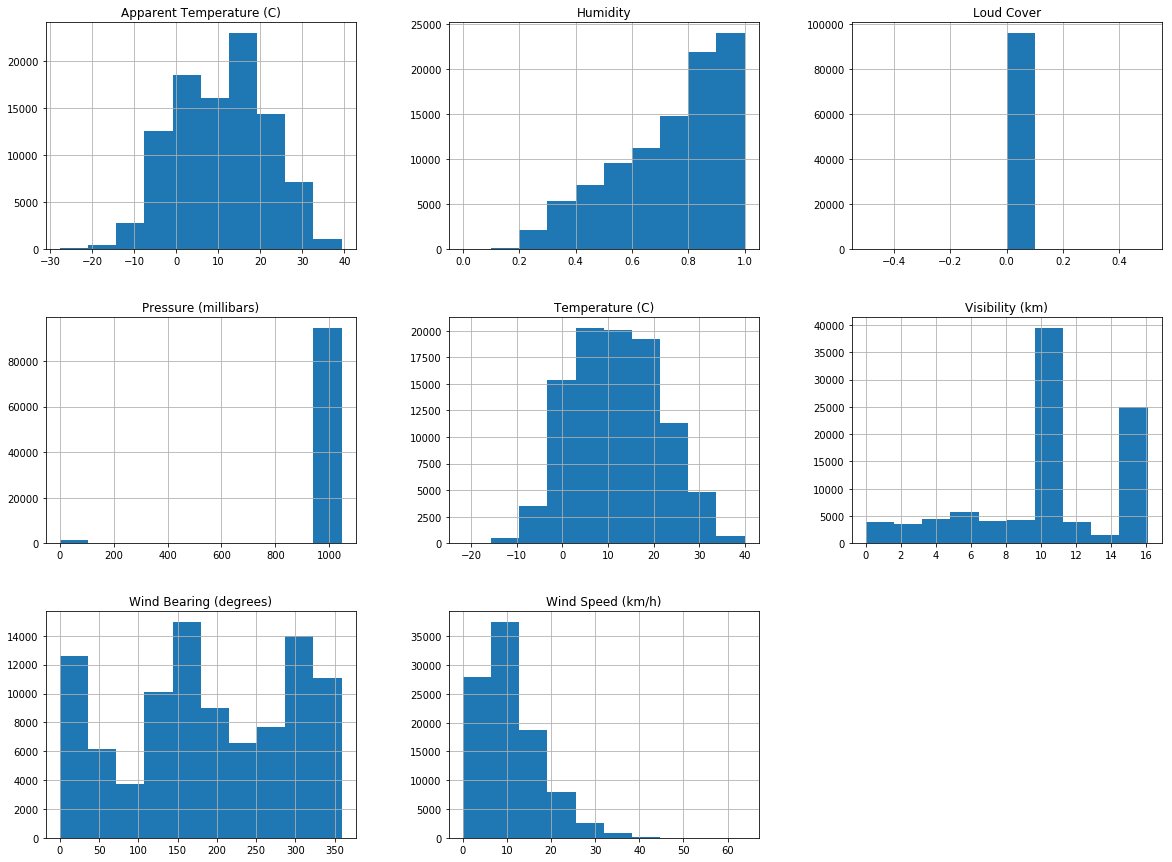

In [32]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import TransformerMixin #gives fit_transform method for free

# Your code goes here for this section.

%matplotlib inline
avocado.hist(bins = 10, figsize = (20,15))
plt.show()



In [33]:
# Check corrolation
corr_matrix =avocado1.corr()
corr_matrix["Visibility (km)"].sort_values(ascending = False)

Visibility (km)             1.000000
Temperature (C)             0.393719
Apparent Temperature (C)    0.382589
Wind Speed (km/h)           0.100801
Pressure (millibars)        0.061011
Wind Bearing (degrees)      0.048900
Humidity                   -0.370511
Loud Cover                       NaN
Name: Visibility (km), dtype: float64

Data Cleaning - Handling Categorical Attributes
In this case, the categorical attribute that needs to be handled is the 'Precip Type' feature.

In [47]:
# calculate each type's total number of Summary
result = pd.value_counts(avocado["Summary"])
result

Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
avocado1_cat = avocado1["Summary"]
avocado1_cat_encoded = encoder.fit_transform(avocado1_cat)
avocado1_cat_encoded

array([19, 19, 17, ..., 19, 19, 19])

In [35]:
print(encoder.classes_)

['Breezy' 'Breezy and Dry' 'Breezy and Foggy' 'Breezy and Mostly Cloudy'
 'Breezy and Overcast' 'Breezy and Partly Cloudy' 'Clear'
 'Dangerously Windy and Partly Cloudy' 'Drizzle' 'Dry'
 'Dry and Mostly Cloudy' 'Dry and Partly Cloudy' 'Foggy'
 'Humid and Mostly Cloudy' 'Humid and Overcast' 'Humid and Partly Cloudy'
 'Light Rain' 'Mostly Cloudy' 'Overcast' 'Partly Cloudy' 'Rain' 'Windy'
 'Windy and Dry' 'Windy and Foggy' 'Windy and Mostly Cloudy'
 'Windy and Overcast' 'Windy and Partly Cloudy']


In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
avocado1_cat_1hot = encoder.fit_transform(avocado1_cat_encoded.reshape(-1,1))
avocado1_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Feature Scaling

In [37]:
# Split X and y
from sklearn.model_selection import train_test_split

avocado1_1 = avocado1.copy() #.drop(['Number','type', 'Date'], axis = 1)

X = avocado1_1.drop("Visibility (km)", axis = 1)
y = avocado1_1["Visibility (km)"]

In [38]:
avocado1_labels = avocado1_1['Summary']
avocado1_num = X.drop('Summary', axis = 1)

In [39]:
from sklearn.preprocessing import LabelBinarizer

class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)
    
class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
          self.attribute_names = attribute_names 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

scaler = StandardScaler() 
 
num_attribs = list(avocado1_num)
#cat_attribs1 = ["Formatted Date"]
#cat_attribs2 = ["Summary"]
cat_attribs3 = ["Summary"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('std_scaler', StandardScaler()),
])

cat_pipeline3 = Pipeline([
    ('selector', DataFrameSelector(cat_attribs3)), 
    ('label_binarizer', MyLabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline3", cat_pipeline3)
])


In [40]:
# Apply Pipeline
a1_p = full_pipeline.fit_transform(X)

# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(a1_p, y, test_size = 0.3, random_state = 42)

# Rearrange data index
y_train.index = range(len(y_train))
y_test.index = range(len(y_test))

X_train

array([[-0.35721335, -0.44228561, -0.07582618, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.84628937,  1.73167697, -1.60860387, ...,  0.        ,
         0.        ,  0.        ],
       [-1.00793162, -0.96270965,  0.58837748, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.54180604, -0.58120358,  0.84384043, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75440618,  0.77428334,  0.43509971, ...,  0.        ,
         0.        ,  0.        ],
       [-0.72523777, -0.78025023,  0.84384043, ...,  0.        ,
         0.        ,  0.        ]])

- - -
## 3. IMPLEMENTATION OF GRADIENT DESCENT (45 pts)
The gradient descent formulation remain the same as one in the lecture. You should write code to implement the **MyLinearRegression** class and its predefined methods:

* **Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code supports any number of features and is well-vectorized.

In [41]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation
from numpy.linalg import inv
from numpy.linalg import pinv

class MyLinearRegression:
    def __int__ (self):
        self.theta = np.random.random(size = X_train.shape[1]) # parameter vector;
        self.alpha = alpha; # learning rate
        #self.beta = beta
        self.cost  = 0; # cost function
  
    def fitUsingGradientDescent(self, X_train, y_train):
        # implementation code here
        self.theta = np.random.random(size = X_train.shape[1])
        self.alpha = alpha
       #self.beta = beta
        self.iters = iters
        gd_reg = self.gradientDescent(X_train, y_train, self.theta, self.alpha, self.iters)
        return gd_reg
    
    def gradientDescent(self, X_train, y_train, theta, alpha, iters):
        # INPUT:
        # alpha: the learning rate
        # iters: number of iterations
        # 
        # OUTPUT: 
        # theta: updated value for theta
        # cost: value of the cost function
        #
        # implementation code here
        self.theta = theta
        self.cost = 0
        self.iters = iters
        #self.beta = beta
        X_train = np.c_[np.ones((len(X_train),1)), X_train]
        num_parameters = X_train.shape[0]   # dim theta
        num_p1 = X_train.shape[1]
        theta = np.random.random(size = num_p1)
        cost = [0.0 for i in range(iters)]
        for i in range(iters):
            cost[i] = self.computeCostFunc(X_train, y_train, theta)
            for k in range(num_p1):
                for j in range (num_parameters):
                    #compute gradients for theta update
                    gradients = 2/num_parameters * X_train[j].T.dot(X_train[j].dot(theta[k]) - y_train[j]) #+ 2*beta*theta[k]  
                    theta[k] = theta[k] - alpha * gradients  #update theta
        return theta, cost
    
    def computeCostFunc(self, X_train, y_train, theta): 
        # compute the cost function 
        #implementation code here
        self.theta = theta
        cf = 0
        for i in range(X_train.shape[0] - 1):
            summands = X_train[i].dot(theta.T) - y_train[i]
            summands = summands * summands
            cf = cf + summands
        return cf / (2 * X_train.shape[0])
    
    def predict(self, X_test, theta):
        # implementation code here 
        self.theta  = theta
        X_t = np.c_[np.ones((len(X_test),1)), X_test]
        y_predict  = (X_t).dot(self.theta)
        return y_predict
    
    def fitUsingNormalEquation(self, X_train, y_train):
        # implementation code here
        X_1 = np.c_[np.ones((len(X_train),1)), X_train]
        y_1 = np.array(y_train)
        xtx = pinv((X_1.T).dot(X_1))
        theta_best = xtx.dot(X_1.T).dot(y_train)
        return theta_best
    


In [73]:
# Your code goes here to call the instance of class MyLinearRegression
iters =25
alpha = 0.006
#beta = 0.001
myGradientDescentModel = MyLinearRegression()

In [48]:
alpha = 0.01
theta, cost = myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)    
cost1 = cost

In [49]:
alpha = 0.02
theta, cost = myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)    
cost2 = cost

In [50]:
alpha = 0.25
theta, cost = myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)    
cost3 = cost

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

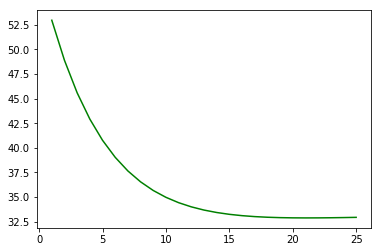

In [75]:
iters_array = range(1, iters+1)
plt.plot(iters_array, cost, color = 'green', label = 'alpha = 0.005')
plt.show()

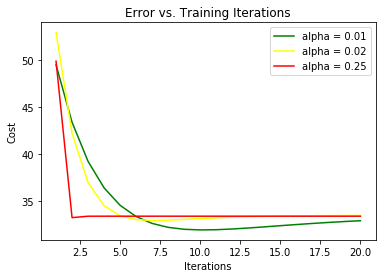

In [51]:
iters_array = range(1, iters+1)
plt.plot(iters_array, cost1, color = 'green', label = 'alpha = 0.01')
plt.plot(iters_array, cost2, color = 'yellow', label = 'alpha = 0.02')
plt.plot(iters_array, cost3, color = 'red', label = 'alpha = 0.25')
plt.legend()
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  
plt.show()

In [8]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.
#
# plt.set_xlabel('Iterations')  
# plt.set_ylabel('Cost')  
# plt.set_title('Error vs. Training Iterations')  

- - -
## 4. IMPLEMENTATION OF THE NORMAL EQUATION (10 pts)

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

- - -
## 5. COMPARISON OF DIFFERENT IMPLEMENTATIONS (20 pts)

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you may also use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the Root Mean Squared Error (RMSE) as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [43]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor

mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)

# myGradientDescentModel_rmse = ?
# myNormalEquationModel_rmse = ?

3.127806947523513


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [74]:
# myGradientDescentModel_rmse = ?
myGradientDescentModel = MyLinearRegression()
theta_gd, cost = myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)    
y_p_gd = myGradientDescentModel.predict(X_test, theta_gd)
y_p_gd = y_p_gd.T
mse_gd = mean_squared_error(y_test, y_p_gd)
myGradientDescentModel_rmse = np.sqrt(mse_gd)
print(myGradientDescentModel_rmse)

8.13125222265603


In [44]:
# myNormalEquationModel_rmse = ?

myNormalEquationModel = MyLinearRegression()
theta_ne = myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

y_p_ne = myNormalEquationModel.predict(X_test, theta_ne)
y_p_ne = y_p_ne.T
mse_ne = mean_squared_error(y_test, y_p_ne)
myNormalEquationModel_rmse = np.sqrt(mse_ne)
print(myNormalEquationModel_rmse)

3.120471695992858


The normal equation yields the best performance for this dataset, since it has the smallest rmse.
The rmse of my gradient descent is around 8.18, about 2-3 times of the one of normal equation. This doesn't seem like a perfect performance, but it is based on my previous work. In earlier version of my data processing code, I chose to keep the 'Procipe Type' feature, but after training my model, I realized that this feature has only two different values, while the 'Summary' has about 30. More different values could give a more specific discription of the condition, thus would increase the accuracy of prediction. So I keep 'Summary' instead, and it actually performes better - the rmse is reduced to 8.18 from 9.7. In further work, I tried different combination of iteration times and learning rate, and finally reduce the rmse to 8.13125. Therefore, I'd say the current rmse is okay.

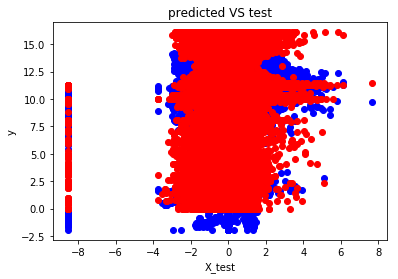

In [76]:
plt.plot(X_test, y_p_ne, 'ro', color = 'blue', label = 'predicted')
plt.plot(X_test, y_test, 'ro', color = 'red', label = 'test')
plt.xlabel('X_test')  
plt.ylabel('y')  
plt.title('predicted VS test')  
plt.show()

- - -
## 6. PRESENTATION OF YOUR SOLUTION (10 pts)

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

1. Interpretation of Project and Solution

In this project, I implemented and trained a model that can predict a certain day's visibility based on given information about that day's weather condition. The dataset provides records on features such as temperature, humidity, wind speed and so on, as well as the corresponding visibility. We use the original records to train the model. With the trained model, we can calculate the visibility from input new data.
I used the strategy of gradient descent, which helps my model to update its parameters according to current prediction performance. The model's performance is affected by its learning rate. The way to measure this model is to compare its predicted values with real values and calculate the error, and the error is presented as "rmse", root-mean-square error. With proper learning rate and iterations, we can have very small rmse, suggesting this model is able to provide relatively accurate predictions on a day's visibility.

2. Things learned so far about the problem

Before constructing the model, I first took a look of the data's big picture. The features that may affect visibility most are temperature, humidity and wind speed. Most days recorded in this dataset are partly cloudy or mostly cloudy. As though 'Precip Type' and 'Summary' are both categorical features, they have quite different power of affecting the model's performance of predicting.
After pre-processing such as feature scaling and handling categorical attributes to make sure the model could be implemented, we need to separate our original dataset into two parts, one for training the model, and the other for testing and measuring. Then I wrote the core part of constructing the model, and put in the training data.

3. Possible Improvement

For the data pre-processing part, there might be more methods to prepare a dataset better for training a regression model. Also, at this time I only put one most important categorical feature into the training data, and if more categorical features are included, the result might improve. I didn't find a proper way to combine some of the features to create new ones, but there could be - or there could be better datasets with more corrolated information.
Beside, for the model implementing part, there are actually varied versions of the gradient descent strategy, and the one I implement for now might not be the best in performance. Actually I have tried the Mini-batch gradient descent, but it is even worse. Also, there could be a better learning rate to help my model find the best predicting parameters.



- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 1:...".

Best of luck and have fun!